## Bayesian Inference in Python with PyMC3
To get a range of estimates, we use Bayesian inference by constructing a model of the situation and then sampling from the posterior to approximate the posterior. This is implemented through Markov Chain Monte Carlo (or a more efficient variant called the No-U-Turn Sampler) in PyMC3. Compared to the theory behind the model, setting it up in code is simple:

Source:
https://towardsdatascience.com/estimating-probabilities-with-bayesian-modeling-in-python-7144be007815

In [4]:
!which jupyter

/c/Users/ramna/Anaconda3/envs/pymc3/Scripts/jupyter


In [1]:
import pymc3 as pm
import numpy as np

In [19]:
saw = ['Lion', 'Tiger', 'Tiger', 'Bear', 'Lion', 'Lion']

In [2]:
alphas = np.array([1, 1, 1]) # Prior for our Multinomial is equally probable...each species
observed = np.array([3, 2, 1]) # have observed 3 Lions, 2 tigers and 1 bear

Notice how a *Multinomial* model is set up in PyMC3.

The Likelihood is a Dirichlet distribution, with equal priors and a shape parameter of 3.
The we set up the model in which we ask: What is the Multinomial model, with the *best* 3-shaped parameters *p* for which this observed data could be "most" representative?

The Dirichlet distribution is a conjugate prior for the multinomial distribution. This means that if the prior distribution of the multinomial parameters is Dirichlet then the posterior distribution is also a Dirichlet distribution (with parameters different from those of the prior). The benefit of this is that 
- (a) the posterior distribution is easy to compute and 
- (b) it in some sense is possible to quantify how much our beliefs have changed after collecting the data.

Conjugate priors are popular, as they often are reasonably flexible and convenient to use for the reasons stated above.

For the special case of the multinomial distribution, 

Let $(p1,p2, …,pk)$ be the vector of multinomial parameters (i.e. the probabilities for the different categories).

If $(p1,p2, …,pk)∼Dirichlet(α1,…,αk)$ prior to collecting the data,  

then, given observations $(x1, x2, …,xk)$ in the different categories, 

$(p1,…,pk)∣(x1,x2, …,xk)∼Dirichlet(α1+x1,α2+x2,…,αk+xk).$ 



In [3]:
# Create model
with pm.Model() as model:
    # Parameters of the Multinomial are from a Dirichlet
    parameters = pm.Dirichlet('parameters', a=alphas, shape=3)
    # Observed data is from a Multinomial distribution
    observed_data = pm.Multinomial(
        'observed_data', n=6, p=parameters, shape=3, observed=observed)    

In [18]:
model.parameters, 
model.observed_data

observed_data

Now, we can sample from the Posterior, to *approximate* the posterior

In [5]:
with model:
    # Sample from the posterior
    trace = pm.sample(draws=1000, chains=2, tune=500, 
                      discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [parameters]
Sampling 2 chains, 0 divergences: 100%|███████████████████████████████████████████| 3000/3000 [00:03<00:00, 826.24draws/s]


This code draws 1000 samples from the posterior in 2 different chains (with 500 samples for tuning that are discarded). We are left with a trace which contains all of the samples drawn during the run. We use this trace to estimate the posterior distribution.

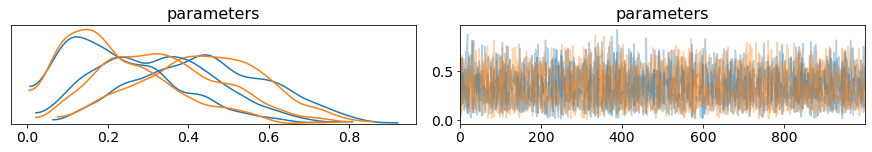

In [9]:
pm.traceplot(trace);

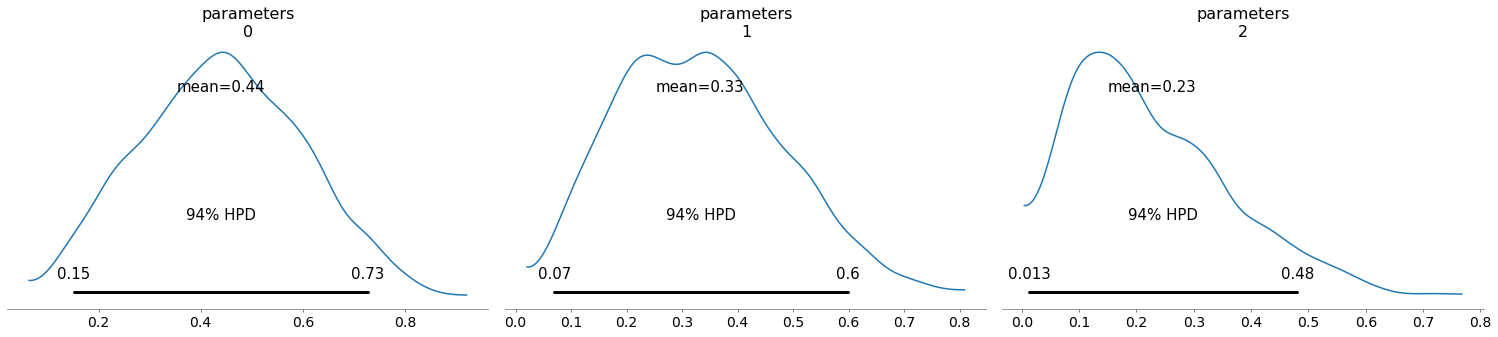

In [10]:
#pm.posterior_plot()
axes = pm.plot_posterior(trace)